In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [64]:
np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

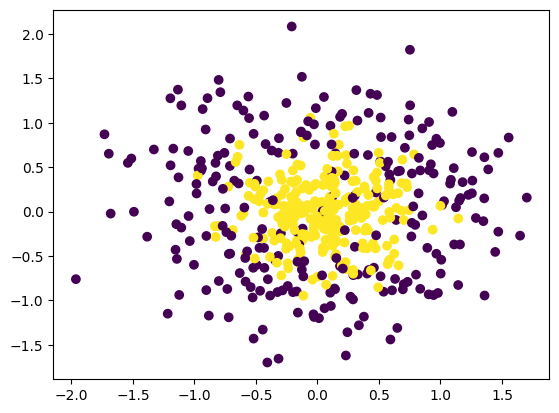

In [66]:
plt.scatter(X[:,0],X[:,1],c=y)

In [67]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

abc = AdaBoostClassifier()

np.mean(cross_val_score(abc,X,y,cv=10,scoring="accuracy"))


np.float64(0.812)

In [68]:
abc.fit(X,y)

AdaBoostClassifier()

<Axes: >

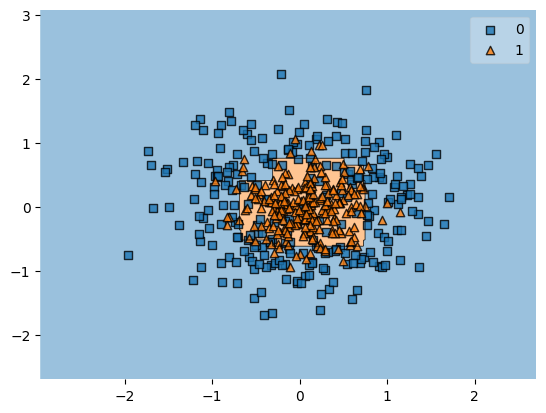

In [70]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X,y,abc)

<Axes: >

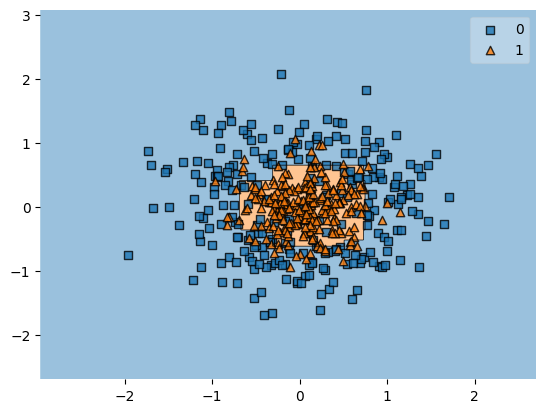

In [72]:
abc = AdaBoostClassifier(n_estimators=100)
abc.fit(X,y)
plot_decision_regions(X,y,abc)

In [76]:
def plot(X,y,clf):
  clf.fit(X,y)
  plot_decision_regions(X,y,clf,markers="o")


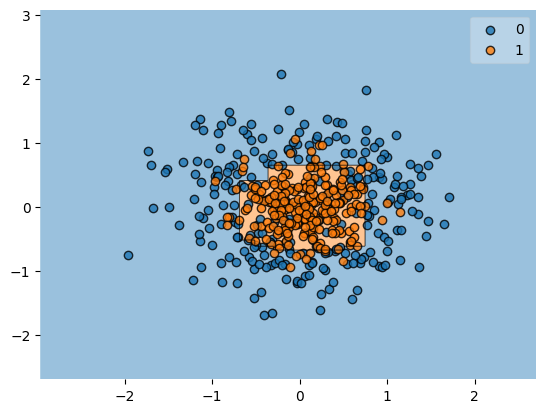

In [77]:
plot(X,y,AdaBoostClassifier(n_estimators=1000,learning_rate=0.1))

In [78]:
from sklearn.model_selection import GridSearchCV

grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['algorithm'] = ['SAMME', 'SAMME.R']

grid

{'n_estimators': [10, 50, 100, 500],
 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
 'algorithm': ['SAMME', 'SAMME.R']}

In [79]:
grid_search = GridSearchCV(
    estimator = AdaBoostClassifier(),
    param_grid= grid,
    n_jobs = -1,
    cv = 10,
    scoring = "accuracy"
)

In [80]:
grid_search.fit(X,y)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
200 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'n_estimators': [10, 50, 100, 500]},
             scoring='accuracy')

In [81]:
grid_search.best_score_

np.float64(0.8320000000000001)

In [82]:
grid_search.best_params_

{'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 500}